# 다중 선형 회귀(Multivariable Linear Regression)
- 다수의 x로 부터 y를 예측하는 회귀 이다
- 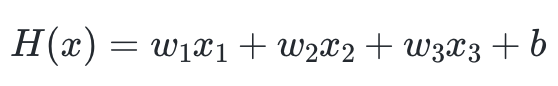

## 파이토치로 구현하기

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
torch.manual_seed(1)

In [11]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [12]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [14]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)#0.01)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복

for epoch in range(nb_epochs + 1):
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 164.925 w2: 164.642 w3: 166.792 b: 1.919 Cost: 5719698432.000000
Epoch  100/1000 w1: 0.729 w2: 0.600 w3: 0.682 b: 0.009 Cost: 0.976561
Epoch  200/1000 w1: 0.733 w2: 0.596 w3: 0.682 b: 0.010 Cost: 0.941145
Epoch  300/1000 w1: 0.737 w2: 0.592 w3: 0.682 b: 0.010 Cost: 0.907563
Epoch  400/1000 w1: 0.741 w2: 0.587 w3: 0.683 b: 0.010 Cost: 0.875709
Epoch  500/1000 w1: 0.744 w2: 0.583 w3: 0.683 b: 0.010 Cost: 0.845499
Epoch  600/1000 w1: 0.748 w2: 0.580 w3: 0.683 b: 0.010 Cost: 0.816860
Epoch  700/1000 w1: 0.752 w2: 0.576 w3: 0.683 b: 0.010 Cost: 0.789685
Epoch  800/1000 w1: 0.755 w2: 0.572 w3: 0.683 b: 0.010 Cost: 0.763914
Epoch  900/1000 w1: 0.759 w2: 0.569 w3: 0.683 b: 0.011 Cost: 0.739459
Epoch 1000/1000 w1: 0.762 w2: 0.565 w3: 0.683 b: 0.011 Cost: 0.716286


## 벡터와 행렬 연산으로 바꾸기
- 위의 구현에선 x의 개수가 3개여서 일일이 선언을 해줌
- 그렇지만 x의 개수가 많아질 경우에는 비효율적이다
- 따라서 행렬 곱셈 연산 또는 백터의 내적을 사용한다

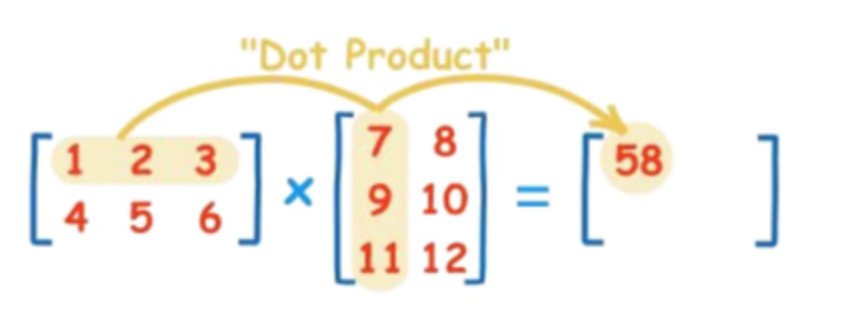

---
### 벡터 연산으로 이해하기
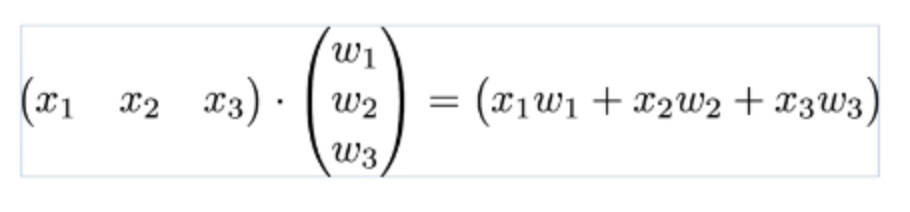

##### 을 통하여 `H(X) = XW`로 표현이 가능한 것을 확인 할 수 있게된다.
---
### 행렬 연산으로 이해하기
#### 훈련 데이터
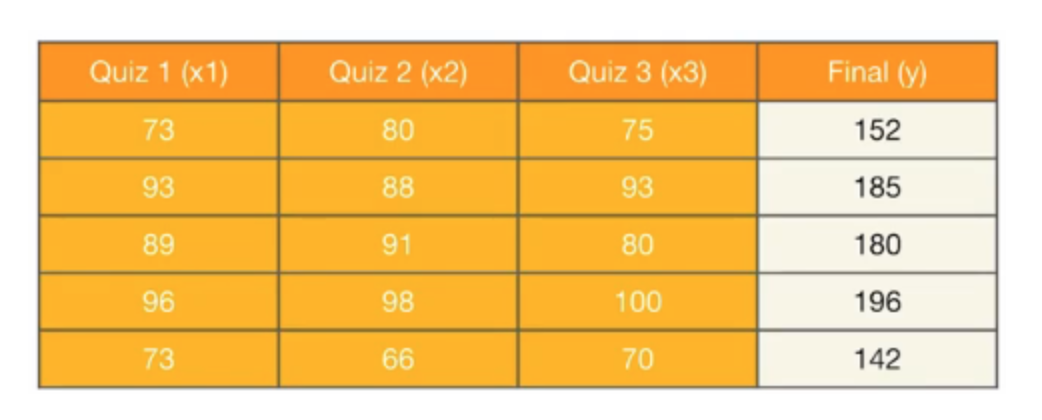

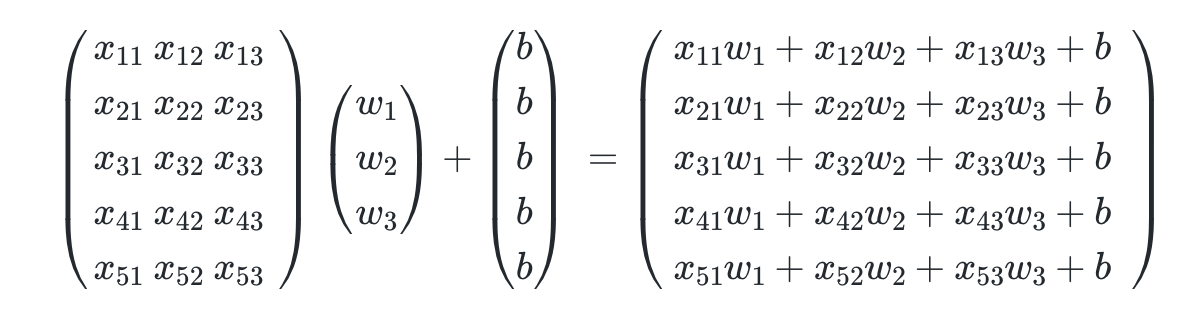 

##### 표현이 가능하다 따라서 결과적으로 `H(X) = XW + B`이다.

## 행렬 연산을 고려하여 파이토치로 구현하기

In [15]:
# 기존 훈련 데이터
# x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
# x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
# x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
# y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [18]:
# 기존 W와 b
# w1 = torch.zeros(1, requires_grad=True)
# w2 = torch.zeros(1, requires_grad=True)
# w3 = torch.zeros(1, requires_grad=True)
# b = torch.zeros(1, requires_grad=True)
W = torch.zeros((3,1),requires_grad = True)
b = torch.zeros(1,requires_grad = True)

In [20]:
#기존 H(x)
# hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
hypothesis = x_train.matmul(W) + b

### Total Code

In [21]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))


Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670898
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.482086
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp